In [12]:
#Importando a biblioteca PANDAS para trabalhar com planilhas
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#Leitura dos Arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [14]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [15]:
#Exibe as primeiras 10 linhas
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [16]:
#Exibe uma amostra do conteúdo, busca aleatória.
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
45,Recife,2019-01-01,15.90,983,8
34,Fortaleza,2019-01-01,3.10,1003,5
29,Fortaleza,2019-01-01,186.29,1005,2
22,Fortaleza,2019-01-01,150.32,1005,1
18,Salvador,2019-01-01,242.31,1035,1


In [17]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [18]:
#alterando o tipo de dados de uma coluna
df['LojaID'] = df['LojaID'].astype('object')

In [19]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**TRABALHANDO COM DADOS AUSENTES**

In [20]:
#Consultando linhas com valores ausentes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [21]:
#substituindo valores ausentes
df['Vendas'].fillna(df['Vendas'].mean(),inplace=True)

In [22]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [23]:
#Média das vendas
df['Vendas'].mean()

122.61180089485438

In [24]:
#Soma total das Vendas
df['Vendas'].sum()

109614.95

In [25]:
#Quantidade total de itens
df['Qtde'].sum()

2916

In [26]:
#Substituindo valores nulos por zero
df['Vendas'].fillna(0,inplace=True)

In [27]:
#Apagando linhas com valores nulos
df.dropna(inplace=True)

In [28]:
#Apagando linhas de uma coluna específica
df.dropna(subset=['Vendas'],inplace=True)

In [29]:
#Removendo linhas que estejam com valores ausentes
df.dropna(how="all", inplace=True)

**CRIANDO COLUNAS NOVAS**

In [30]:
#Criando coluna chamada Receitas.
df['Receitas'] = df['Vendas'].mul(df['Qtde'])
df

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [31]:
#Buscando maior Receita 
df['Receitas'].max()

3544.0

In [32]:
#Buscando menor Receita
df['Receitas'].min()

3.34

In [33]:
#Função NLARGEST = Maiores valores da coluna RECEITAs
df.nlargest(5,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [34]:
#Função NSMALLEST Menores valores das coluna RECEITA
df.nsmallest(5,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [35]:
#Agrupamento por cidade
df.groupby('Cidade')['Receitas'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [36]:
#Ordenando os valores
df.sort_values('Receitas',ascending=False).head(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**TRABALHANDO COM DATAS**

In [37]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [38]:
#Transformando um tipo de coluna
df['Data'] = df['Data'].astype('int64')

In [39]:
#Transformando a coluna Vendas para Inteiro.
df['Vendas'] = df['Vendas'].astype('int64')

In [40]:
df.dtypes

Cidade       object
Data          int64
Vendas        int64
LojaID       object
Qtde          int64
Receitas    float64
dtype: object

In [41]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,1514764800000000000,142,1520,1,142.00
1,Aracaju,1514764800000000000,14,1522,6,85.26
2,Aracaju,1514764800000000000,71,1520,1,71.55
3,Aracaju,1514764800000000000,3,1521,7,21.07
4,Aracaju,1514764800000000000,24,1522,8,196.08


In [42]:
#Transformando a coluna de DATA para DATA.
df['Data'] = pd.to_datetime(df['Data'])

In [43]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas               int64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [44]:
#Agrupando por Ano
df.groupby(df['Data'].dt.year)['Receitas'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [45]:
#Criando coluna Ano_Venda, puxando o Ano do campo DATA.
df['Ano_Venda'] = df['Data'].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
0,Aracaju,2018-01-01,142,1520,1,142.00,2018
1,Aracaju,2018-01-01,14,1522,6,85.26,2018
2,Aracaju,2018-01-01,71,1520,1,71.55,2018
3,Aracaju,2018-01-01,3,1521,7,21.07,2018
4,Aracaju,2018-01-01,24,1522,8,196.08,2018


In [46]:
#Extaindo o Mes e o Dia
df["Mes_Venda"], df["Dia_Venda"] = df["Data"].dt.month, df["Data"].dt.day

In [47]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda
143,Natal,2019-01-02,41,1037,2,82.36,2019,1,2
122,Fortaleza,2019-03-02,235,983,3,705.18,2019,3,2
205,Salvador,2019-01-02,196,1037,1,196.09,2019,1,2
34,Recife,2019-01-01,24,980,5,124.85,2019,1,1
139,Natal,2019-01-02,169,1036,1,169.01,2019,1,2
177,Natal,2019-01-02,41,1037,2,82.38,2019,1,2
4,Salvador,2019-02-14,19,1037,3,58.41,2019,2,14
81,Natal,2019-04-02,564,854,2,1128.00,2019,4,2
113,Aracaju,2018-01-01,23,1521,9,207.45,2018,1,1
195,Natal,2019-01-02,44,1036,3,134.67,2019,1,2


In [48]:
#Retornando a Data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [49]:
#Retornando a Data mais Atual
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [50]:
#Calculo para ver a diferença em Dias
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [51]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
199,Natal,2019-01-02,153,1036,3,461.61,2019,1,2,366 days
222,Natal,2019-01-02,43,1037,1,43.96,2019,1,2,366 days
47,Natal,2018-03-13,521,854,3,1563.00,2018,3,13,71 days
45,Natal,2019-03-11,431,852,3,1293.00,2019,3,11,434 days
26,Recife,2019-01-01,126,980,1,126.05,2019,1,1,365 days
231,Salvador,2019-01-03,89,1034,2,179.70,2019,1,3,367 days
120,Salvador,2019-03-02,140,1036,2,280.34,2019,3,2,425 days
76,Recife,2019-01-01,17,980,5,89.30,2019,1,1,365 days
28,Natal,2019-02-13,705,853,2,1410.00,2019,2,13,408 days
67,Natal,2019-02-14,379,852,2,758.00,2019,2,14,409 days


In [52]:
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [53]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
155,Salvador,2019-01-02,237,1036,3,713.43,2019,1,2,366 days,1
50,Fortaleza,2019-01-01,33,1005,3,101.07,2019,1,1,365 days,1
40,Aracaju,2018-01-01,6,1522,7,48.93,2018,1,1,0 days,1
17,Aracaju,2018-01-01,162,1522,9,1459.71,2018,1,1,0 days,1
212,Salvador,2019-01-02,50,1037,3,152.19,2019,1,2,366 days,1
20,Salvador,2019-01-01,33,1034,3,101.91,2019,1,1,365 days,1
85,Natal,2019-01-02,16,1035,3,50.64,2019,1,2,366 days,1
54,Natal,2018-10-03,373,852,4,1492.00,2018,10,3,275 days,4
25,Salvador,2019-01-01,220,1035,1,220.62,2019,1,1,365 days,1
135,Fortaleza,2019-03-02,10,983,5,53.95,2019,3,2,425 days,1


In [54]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [55]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
140,Fortaleza,2019-03-02,166,983,5,834.45,2019,3,2,425 days,1
5,Natal,2019-03-30,674,854,2,1348.00,2019,3,30,453 days,1
118,Salvador,2019-03-02,92,1035,2,184.42,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39,982,8,316.48,2019,3,2,425 days,1
119,Recife,2019-03-02,152,982,7,1066.10,2019,3,2,425 days,1
139,Recife,2019-03-02,141,980,7,988.12,2019,3,2,425 days,1
116,Recife,2019-03-02,79,982,2,158.20,2019,3,2,425 days,1
118,Fortaleza,2019-03-02,17,981,5,88.50,2019,3,2,425 days,1
2,Natal,2019-03-11,308,852,3,924.00,2019,3,11,434 days,1
123,Salvador,2019-03-02,127,1036,3,382.35,2019,3,2,425 days,1


**VISUALIZAÇÃO DE DADOS**

In [56]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

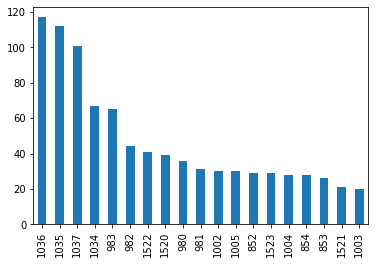

In [57]:
#Gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

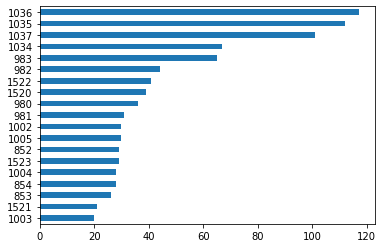

In [77]:
#Gráfico de Barras Horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

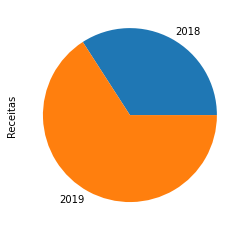

In [58]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie()

In [59]:
#Total Vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

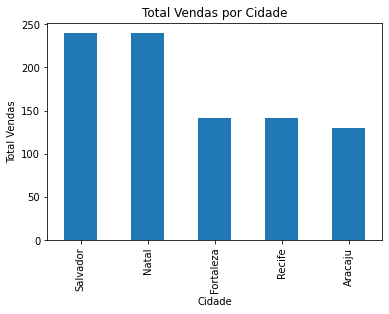

In [60]:
#Adicionando um titulo e alterando o nome dos eixos
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

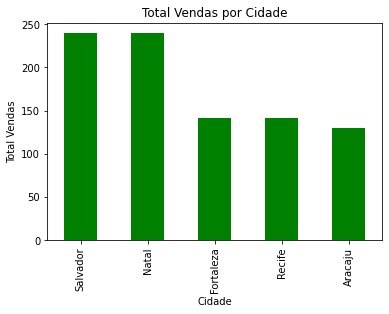

In [61]:
#Trocando a cor do gráfico
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [62]:
#Alterando o Estilo do Gráfico
plt.style.use('ggplot')

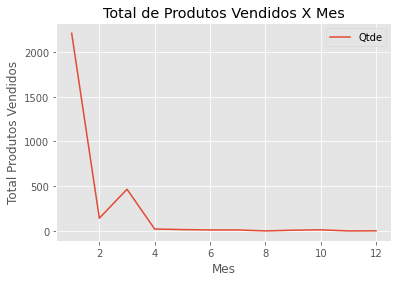

In [85]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title="Total de Produtos Vendidos X Mes")
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos');
plt.legend()

In [63]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

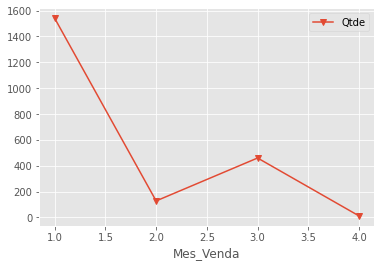

In [66]:
#Total produtos vendidos por mes
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel = ('Mes')
plt.ylabel = ('Total Produtos Vendidos');
plt.legend()

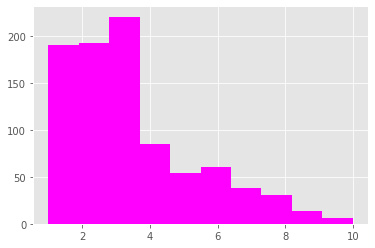

In [67]:
#Gráfico de Histograma
plt.hist(df["Qtde"], color='Magenta');

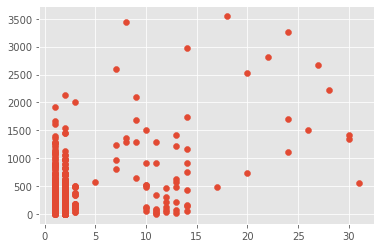

In [68]:
#Gráfico de Scatter
plt.scatter(x= df_2019['Dia_Venda'], y = df_2019['Receitas']);

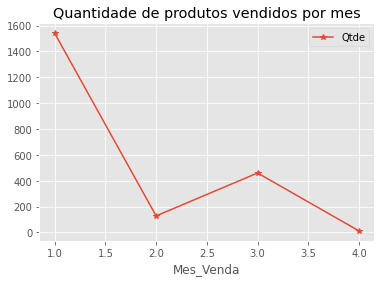

In [70]:
#Salvando Gráficos como imagem PNG
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='*')
plt.title('Quantidade de produtos vendidos por mes')
plt.xlabel=('Mes')
plt.ylabel=('Total produtos vendidos');
plt.legend()
plt.savefig('grafico QTDE x MÊS.png') 